In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    RocCurveDisplay
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import ComplementNB, MultinomialNB

In [2]:
%matplotlib inline

In [3]:
sns.set(rc={"figure.figsize": (30, 15)})
sns.set(font_scale=4)

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [4]:
df = pd.read_csv("spam_or_not_spam.csv")

In [5]:
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [7]:
df["label"].value_counts()

0    2500
1     500
Name: label, dtype: int64

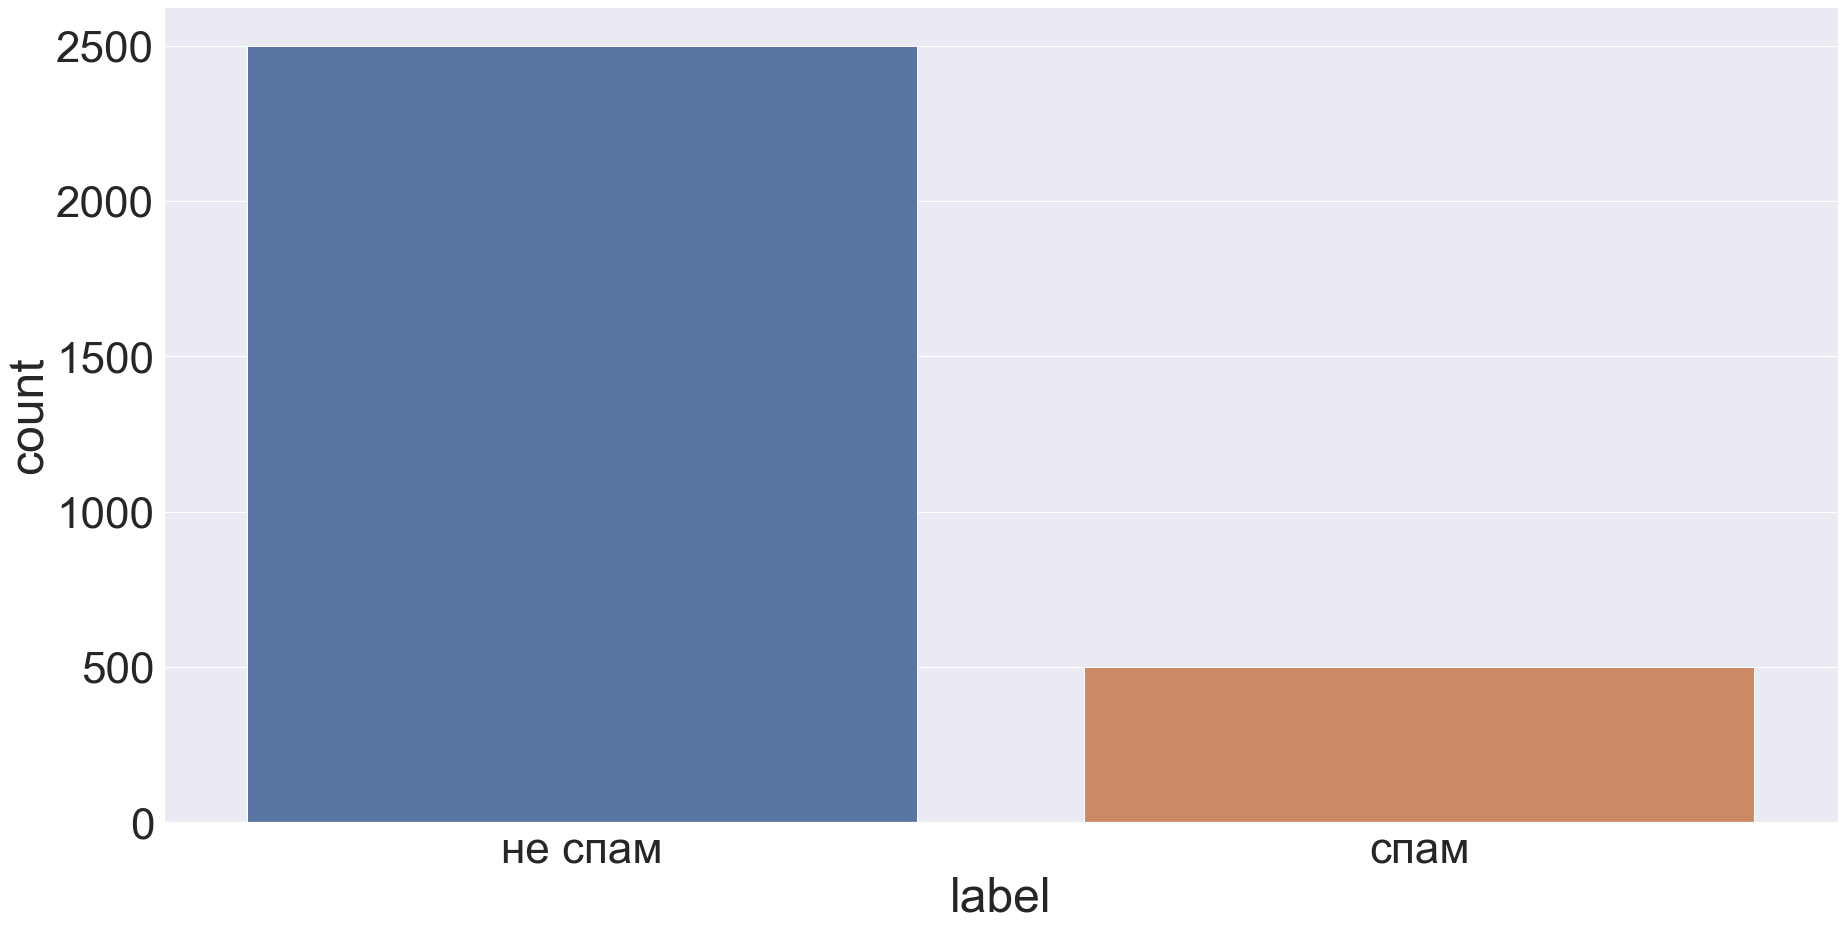

In [8]:
ax = sns.countplot(x=df["label"])
ax.set_xticklabels(["не спам", "спам"])
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [9]:
df = df.replace(r"^\s*$", np.NaN, regex=True).dropna()

Переводим данные в векторный вид:

In [10]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [11]:
X.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [12]:
y = df["label"]

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [14]:
y_test.mean()

0.16533333333333333

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [32]:
clf = ComplementNB(alpha=0.01)

In [33]:
clf.fit(X_train, y_train)

ComplementNB(alpha=0.01)

In [34]:
y_pred = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [35]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F-1 score: {f1_score(y_test, y_pred)}")

Accuracy: 0.988
Precision: 1.0
Recall: 0.9274193548387096
F-1 score: 0.9623430962343097


In [27]:
clf = MultinomialNB(alpha=0.01)

In [28]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F-1 score: {f1_score(y_test, y_pred)}")

Accuracy: 0.9866666666666667
Precision: 1.0
Recall: 0.9193548387096774
F-1 score: 0.9579831932773109


Нарисуйте ROC-кривую:

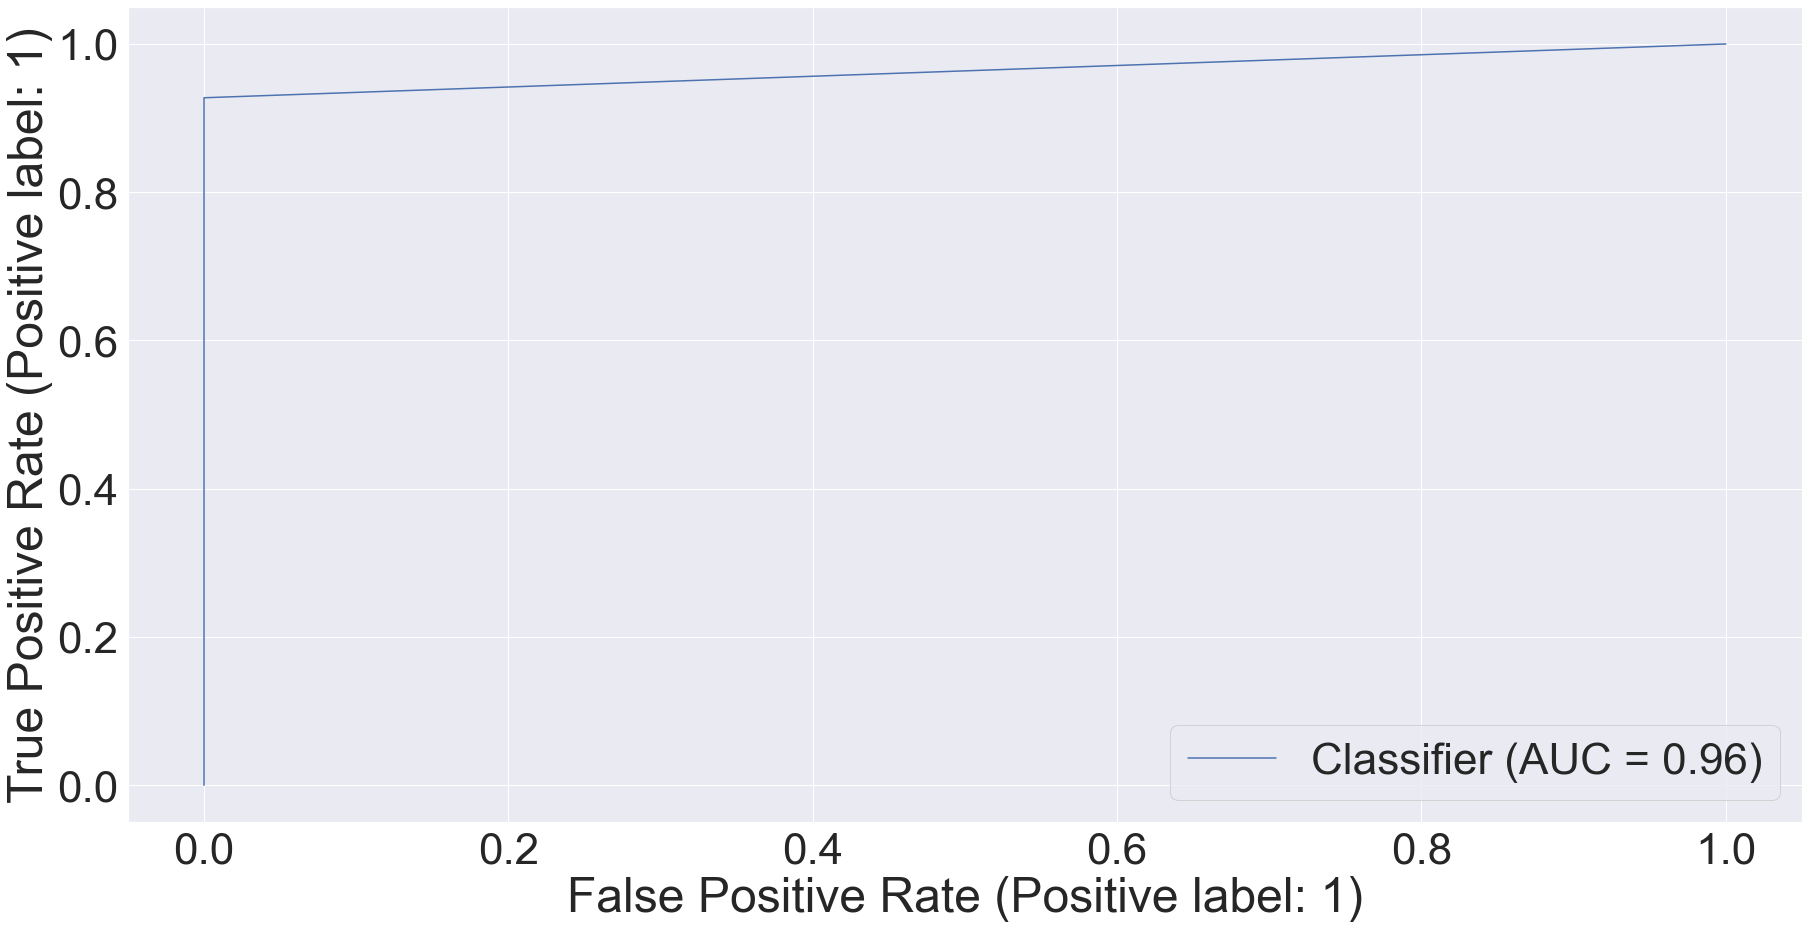

In [36]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [37]:
param_grid = {
    "alpha": [1, 0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
}

In [38]:
cv = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1)

In [39]:
cv.fit(X_train, y_train)

GridSearchCV(estimator=ComplementNB(alpha=0.01), n_jobs=-1,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08, 1e-09, 1e-10]},
             scoring='accuracy')

In [40]:
cv.best_params_

{'alpha': 1}

In [41]:
cv.best_score_

0.9902103439742639

In [42]:
y_pred = cv.best_estimator_.predict(X_test)

In [43]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F-1 score: {f1_score(y_test, y_pred)}")

Accuracy: 0.9933333333333333
Precision: 0.9917355371900827
Recall: 0.967741935483871
F-1 score: 0.979591836734694
